# COVID 19 Data analysis 

In [1]:
url="https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"

In [66]:
 #importing some imp libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sb

In [5]:
# Importing the dataset in df variable
df = pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


# 2. High Level Understanding of data

In [6]:
#finding Rpws and Columns
print("No. of Rows= ",df.shape[0],"\nNo. of Columns= ",df.shape[1])

No. of Rows=  57394 
No. of Columns=  49


In [7]:
#Data Types of all columns
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [ ]:
#Information about dataframe
df.info()

In [ ]:
#Describe Dataframe
df.describe()

# 3.  Low Level Data Understanding

In [8]:
#finding unique values in location
print("No. of Unique locations ",df["location"].nunique())

No. of Unique locations  216


In [11]:
#findig continet with maximum frequency
print("Continent with maximum frequency",df["continent"].value_counts().max())

Continent with maximum frequency 14828


In [10]:
#Find maximum & mean value in 'total_cases'.
print("Max value in Total cases ",df["total_cases"].max())

Max value in Total cases  55154651.0


In [12]:
print("Mean value in Total cases ",df["total_cases"].mean())

Mean value in Total cases  167797.3688753302


In [13]:
#Finding 25% of total deaths
print("25% of total deaths is ",df["total_deaths"].quantile(0.25))

25% of total deaths is  13.0


In [14]:
#Finding 50% of total deaths
print("50% of total deaths is ",df["total_deaths"].quantile(0.5))

50% of total deaths is  84.0


In [15]:
#Finding 75% of total deaths
print("75% of total deaths is ",df["total_deaths"].quantile(0.75))

75% of total deaths is  727.0


In [20]:
#find which continent has maximum 'human_development_index'.
df.groupby("continent")["human_development_index"].max().nlargest(2)

continent
Europe     0.953
Oceania    0.939
Name: human_development_index, dtype: float64

In [24]:
#finding continet has min GDP per capita
df.groupby("continent")["gdp_per_capita"].min().nsmallest(3)

continent
Africa            661.240
Asia             1479.147
North America    1653.173
Name: gdp_per_capita, dtype: float64

#  4. Filter the dataframe with only this columns
['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']

In [25]:
df1=df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
df1.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


# 5. Data Cleaning

In [27]:
print("Number of Rows before removing duplicates ",df.shape[0])

Number of Rows before removing duplicates  57394


In [37]:
#Drop duplicates
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates duplicates ",df.shape[0])

Number of rows after removing duplicates duplicates  56748


In [39]:
#findind missing values in all columns
df.isnull().sum()

iso_code                                  0
continent                                 0
location                                  0
date                                      0
total_cases                            3600
new_cases                               670
new_cases_smoothed                     1478
total_deaths                          12964
new_deaths                              670
new_deaths_smoothed                    1478
total_cases_per_million                3600
new_cases_per_million                   670
new_cases_smoothed_per_million         1478
total_deaths_per_million              12964
new_deaths_per_million                  670
new_deaths_smoothed_per_million        1478
reproduction_rate                     19342
icu_patients                          52258
icu_patients_per_million              52258
hosp_patients                         51743
hosp_patients_per_million             51743
weekly_icu_admissions                 56391
weekly_icu_admissions_per_millio

In [38]:
#c. Remove all observations where continent column value is missing
print("Number of Rows before dropping Null values from continent ",df.shape[0])
df.dropna(subset=["continent"],inplace=True)
df
print("Number of Rows after dropping Null values from continent ",df.shape[0])

Number of Rows before dropping Null values from continent  56748
Number of Rows after dropping Null values from continent  56748


In [40]:
df.isnull().sum()

iso_code                                  0
continent                                 0
location                                  0
date                                      0
total_cases                            3600
new_cases                               670
new_cases_smoothed                     1478
total_deaths                          12964
new_deaths                              670
new_deaths_smoothed                    1478
total_cases_per_million                3600
new_cases_per_million                   670
new_cases_smoothed_per_million         1478
total_deaths_per_million              12964
new_deaths_per_million                  670
new_deaths_smoothed_per_million        1478
reproduction_rate                     19342
icu_patients                          52258
icu_patients_per_million              52258
hosp_patients                         51743
hosp_patients_per_million             51743
weekly_icu_admissions                 56391
weekly_icu_admissions_per_millio

In [41]:
#Fill all missing values with 0
df.fillna(0,inplace=True)

In [42]:
df.isnull().sum()

iso_code                              0
continent                             0
location                              0
date                                  0
total_cases                           0
new_cases                             0
new_cases_smoothed                    0
total_deaths                          0
new_deaths                            0
new_deaths_smoothed                   0
total_cases_per_million               0
new_cases_per_million                 0
new_cases_smoothed_per_million        0
total_deaths_per_million              0
new_deaths_per_million                0
new_deaths_smoothed_per_million       0
reproduction_rate                     0
icu_patients                          0
icu_patients_per_million              0
hosp_patients                         0
hosp_patients_per_million             0
weekly_icu_admissions                 0
weekly_icu_admissions_per_million     0
weekly_hosp_admissions                0
weekly_hosp_admissions_per_million    0


# 6. Data time Format

In [43]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [45]:
# a. Convert date column in datetime format using pandas.to_datetime
df["date"]=pd.to_datetime(df["date"])
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-01,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-03-01,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-04-01,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56743,ZWE,Africa,Zimbabwe,2020-11-13,8696.0,29.0,36.000,255.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56744,ZWE,Africa,Zimbabwe,2020-11-14,8765.0,69.0,42.000,257.0,2.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56745,ZWE,Africa,Zimbabwe,2020-11-15,8786.0,21.0,41.143,257.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56746,ZWE,Africa,Zimbabwe,2020-11-16,8786.0,0.0,36.429,257.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [46]:
#Checking after conversion
df.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 float64
icu_patients_per_million                     f

In [47]:
# Create new column month after extracting month data from date column.
df['month']=df['date'].dt.month

In [48]:
df["month"]

0        12
1         1
2         2
3         3
4         4
         ..
56743    11
56744    11
56745    11
56746    11
56747    11
Name: month, Length: 56748, dtype: int64

# 7. Data Aggregation

In [52]:
df['continent'].value_counts()

Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: continent, dtype: int64

In [53]:
# a. Find max value in all columns using groupby function on 'continent' column
# Tip: use reset_index() after applying groupby
df.groupby("continent").max().reset_index()

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,7.1,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12


In [54]:
# saving the above result in new data frame
df_groupby=df.groupby("continent").max().reset_index()

In [55]:
df_groupby.head()

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12


# 8. Feature Engineering

In [56]:
#a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby["total_deaths_to_total_cases"]=(df_groupby["total_deaths"]/df_groupby["total_cases"])*100

In [57]:
df_groupby["total_deaths_to_total_cases"]

0    2.700364
1    1.470754
2    2.618830
3    2.206241
4    3.268468
5    2.825066
Name: total_deaths_to_total_cases, dtype: float64

# 9. Data Visualiztion

In [58]:
#for ignoring future warnigs
import warnings
warnings.filterwarnings("ignore")

array([[<AxesSubplot:title={'center':'gdp_per_capita'}>]], dtype=object)

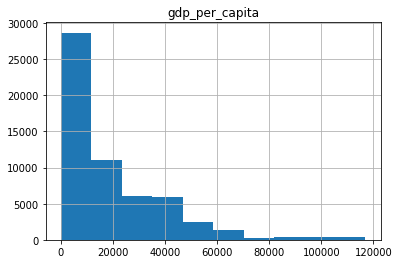

In [68]:
#ploting histograph of gdp_per_capita

df.hist(column="gdp_per_capita")

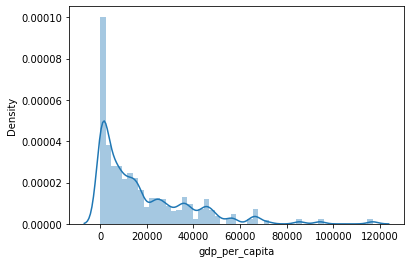

In [69]:
# Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
dist_plot1=sb.distplot(df["gdp_per_capita"])


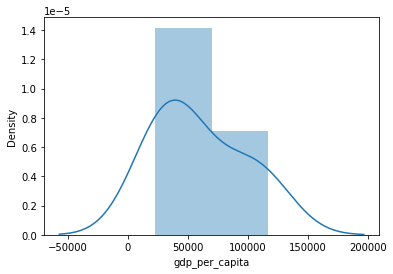

In [70]:
# Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
dist_plot2=sb.distplot(df_groupby["gdp_per_capita"])


In [71]:
#to get image of graph in jpg format
dist_plot1.get_figure().savefig("9_a1.jpg")

In [72]:
#to get image of graph in jpg format
dist_plot2.get_figure().savefig("9_a2.jpg")

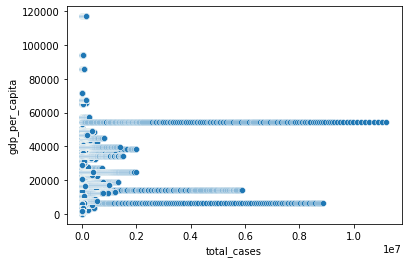

In [73]:
#Plot a scatter plot of 'total_cases' & 'gdp_per_capita' 
scatter_plot1=sb.scatterplot(x=df["total_cases"],y=df["gdp_per_capita"])

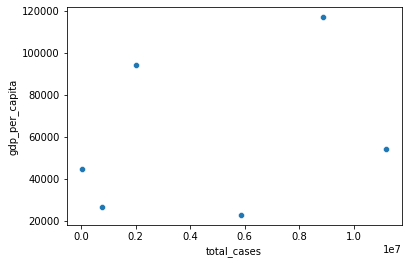

In [74]:
#Plot a scatter plot of 'total_cases' & 'gdp_per_capita' 
scatter_plot2=sb.scatterplot(x=df_groupby["total_cases"],y=df_groupby["gdp_per_capita"])

In [75]:
#to get image of graph in jpg format
scatter_plot1.get_figure().savefig("9_b1.jpg")

In [76]:
#to get image of graph in jpg format
scatter_plot1.get_figure().savefig("9_b2.jpg")

In [77]:
#c. Plot Pairplot on df_groupby dataset
#pair_plot1=sb.pairplot(df_groupby)

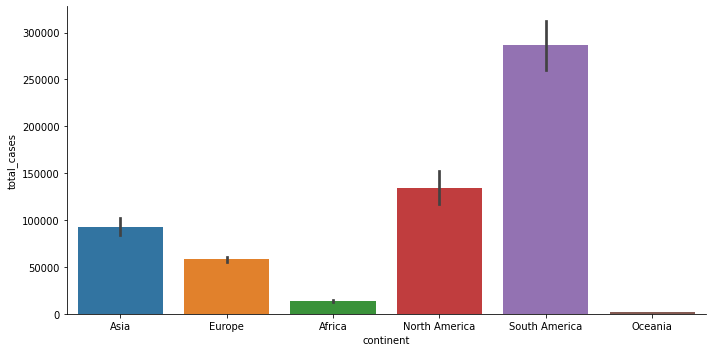

In [78]:
#Plot a bar plot of 'continent' column with 'total_cases'.
bar_plot1=sb.catplot(data=df,x="continent",y="total_cases",kind="bar",aspect=2.0)

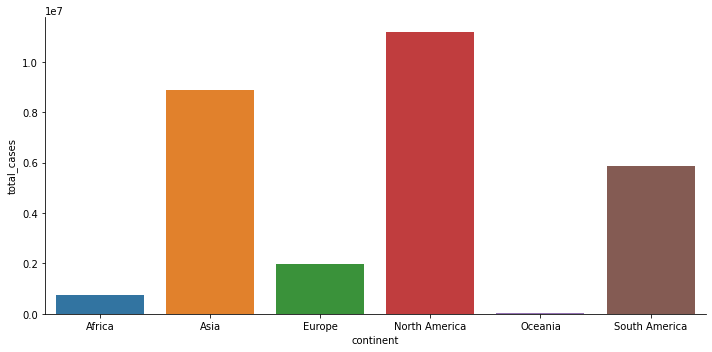

In [79]:
#Plot a bar plot of 'continent' column with 'total_cases'.
bar_plot2=sb.catplot(data=df_groupby,x="continent",y="total_cases",kind="bar",aspect=2.0)

# 10.Save the df_groupby dataframe in your local drive using pandas.to_csv function 

In [80]:
df_groupby.to_csv('COVID-19_grouped_data.csv')

In [81]:
print("Number of rows in df_groupby dataset= ",df_groupby.shape[0])

Number of rows in df_groupby dataset=  6


In [82]:
print("Number of columns in df_groupby dataset= ",df_groupby.shape[1])

Number of columns in df_groupby dataset=  51
